In [0]:
# Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
# Load data
# !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-26 16:17:25--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.9’

moore.csv.9         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-26 16:17:26 (50.4 MB/s) - ‘moore.csv.9’ saved [2302/2302]



In [0]:
# Load data
data = pd.read_csv("moore.csv", header=None).values
X = data[:,0].reshape(-1, 1) # Transform to a 2d array
Y = data[:,1]

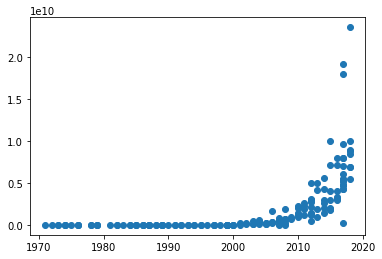

In [153]:
# Plot the data
plt.scatter(X, Y)

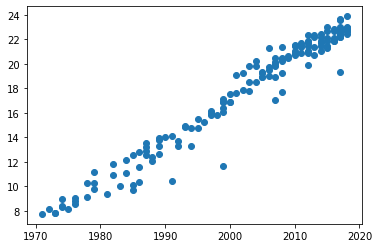

In [154]:
# Simplify Y
Y = np.log(Y)
plt.scatter(X, Y)

In [0]:
# Center the data arround 0
X = X - X.mean()

In [0]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

# Dynamic learning rate
def schedule (epoch, lr):
    if (epoch >= 50):
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler], verbose=0)

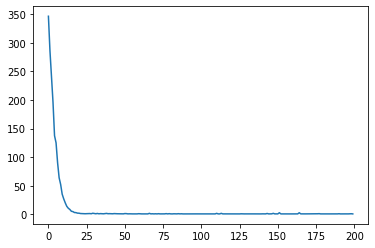

In [157]:
# Plot the output
plt.plot(r.history["loss"], label="loss")

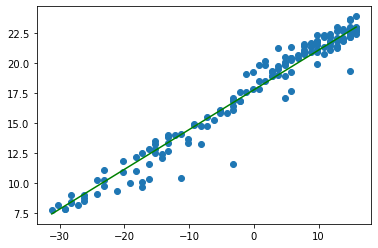

In [161]:
# Get the slope of the line and display
Yhat = model.predict(X).flatten()

plt.scatter(X, Y)
plt.plot(X, Yhat, "g")